## Исследование данных о российском кинопрокате



Перед нами поставлена задача изучить рынок российского кинопроката и провести аналитическое исследование. Мы получили данные о прокатных удостоверениях, сборах и государственной поддержке фильмов, опубликованные на портале Министерства культуры, а также информацию с КиноПоиска о жанрах, режиссерах, продюссерах и т.д..

### Шаг 1.  Откроем файлы с данными и объединим их в один датафрейм. 


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

Импортируем данные

In [2]:
data = pd.read_csv('mkrf_movies.csv')
df2 = pd.read_csv('mkrf_shows.csv')

In [3]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
df2.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [5]:
data.shape, df2.shape

((7486, 15), (3158, 2))

In [6]:
data['puNumber']

0       221048915
1       111013716
2       221038416
3       221026916
4       221030815
          ...    
7481    126008019
7482    121037819
7483    124010819
7484    124010619
7485    124010719
Name: puNumber, Length: 7486, dtype: object

In [7]:
df2['puNumber']

0       111000113
1       111000115
2       111000116
3       111000117
4       111000118
          ...    
3153    224014814
3154    224021411
3155    224022410
3156    224023210
3157    224026410
Name: puNumber, Length: 3158, dtype: int64

Типы столбца, по которому следует объединять данные, не совпадают, нужно исправить

In [8]:
# приведем к одному типу для объединения
try:
    data['puNumber'] = data['puNumber'].astype(int)
except Exception as e:
    print(e)

invalid literal for int() with base 10: 'нет'


In [9]:
data[data['puNumber'] == '0']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


In [10]:
data[data['puNumber'] == 'нет'] = 0

In [11]:
# приведем к одному типу для объединения
try:
    data['puNumber'] = data['puNumber'].astype(int)
except Exception as e:
    print(e)

In [12]:
data = data.merge(df2, on='puNumber', how='left')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [13]:
data['box_office'].unique()

array([           nan, 2.70000000e+03, 3.60000000e+02, ...,
       3.14379050e+06, 1.80017724e+07, 2.19569000e+05])

In [14]:
data.shape

(7486, 16)

С размерностью всё ок, приступим к предобработке

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     333 non-null    float64
 10  nonrefundable_support  333 non-null    float64
 11  budget                 333 non-null    float64
 12  financing_source       333 non-null    object 
 13  ratings                6520 non-null   object 
 14  genres                 6511 non-null   object 
 15  box_

Преобразуем столбец **show_start_date** в правильный формат

In [16]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
data['show_start_date']

0      2015-11-27 12:00:00+00:00
1      2016-09-13 12:00:00+00:00
2      2016-10-10 12:00:00+00:00
3      2016-06-10 12:00:00+00:00
4      2015-07-29 12:00:00+00:00
                  ...           
7481   2019-12-23 12:00:00+00:00
7482   2019-12-24 12:00:00+00:00
7483   2019-12-28 12:00:00+00:00
7484   2019-12-30 12:00:00+00:00
7485   2019-12-30 12:00:00+00:00
Name: show_start_date, Length: 7486, dtype: datetime64[ns, UTC]

Преобразуем столбец **puNumber** в целочисленный тип

In [17]:
try:
    data['puNumber'] = data['puNumber'].astype(int)
except Exception as e: 
    print(str(e))

In [18]:
data[data['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [19]:
# Заменим на 0 некорректный номер прокатного удостоверения
data.loc[data['puNumber'] == 'нет', 'puNumber'] = 0

In [20]:
data['puNumber'] = data['puNumber'].astype(int)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     333 non-null    float64            
 10  nonrefundable_support  333 non-null    float64            
 11  budget                 333 non-null    float64          

Проверим столбец **ratings**

In [22]:
try:
    data['ratings'] = data['ratings'].astype(float)
except Exception as e: 
    print(str(e))

could not convert string to float: '99%'


In [23]:
# Уберем процент из рейтинга, приведем к float, разделим все проценты на 10 для корректности
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype(float)
data.loc[data['ratings'] > 10, 'ratings'] = data.loc[data['ratings'] > 10, 'ratings'] / 10
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     333 non-null    float64            
 10  nonrefundable_support  333 non-null    float64            
 11  budget                 333 non-null    float64          

In [24]:
data['ratings'].unique() # проверим корректность рейтингов

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Форматы исправлены, перейдем к пропускам

#### Шаг 2.2. Изучим пропуски в датафрейме



In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     333 non-null    float64            
 10  nonrefundable_support  333 non-null    float64            
 11  budget                 333 non-null    float64          

Рассмотрим столбцы **director и producer**

In [26]:
data[data['director'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


In [27]:
data[data['producer'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.0,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,"драма,мелодрама,военный",NaN


Заменить пропуски в таких столбцах на что-то осмысленное представляется возможным - нам негде взять эти данные.

Заменим на "Неизвестен"

In [28]:
data['director'].fillna('Неизвестен', inplace=True)
data['producer'].fillna('Неизвестен', inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     333 non-null    float64            
 10  nonrefundable_support  333 non-null    float64            
 11  budget                 333 non-null    float64          

Перейдем к столбцам **refundable_support, nonrefundable_support и budget**

In [30]:
data[data['refundable_support'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
data[data['nonrefundable_support'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data[data['budget'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
import warnings

warnings.filterwarnings("ignore")

data[['budget', 'nonrefundable_support', 'refundable_support']].fillna(0, inplace=True)

Рассмотрим столбец **financing_source**

In [34]:
data[data['financing_source'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [35]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино', 0,
       'Министерство культуры, Фонд кино'], dtype=object)

В этом столбце находится информация об источнике государственного финансирования. Если значение пропущено, значит, гос. финансирования не было.

Стоит заметить, что количество пропусков в этом столбце совпадает с кол-вом пропусков в столбцах **refundable_support, nonrefundable_support и budget**. Может быть, это просто фильмы, у которых не было гос. поддержки, и поэтому столбцы пустые?

Проверим это

In [36]:
check = data.loc[(data['financing_source'].isna()) & 
                 (data['refundable_support'].isna()) & 
                 (data['nonrefundable_support'].isna()) & 
                 (data['budget'].isna())]
check

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     333 non-null    float64            
 10  nonrefundable_support  333 non-null    float64            
 11  budget                 333 non-null    float64          

In [38]:
data.shape[0] - check.shape[0]

333

**Действительно - фильмы, у которых источник гос. финансирования отсутствует, отсутствует и объём средств гос. поддержки. Скорее всего, это фильмы, не получившие поддержку. Считаю, что это доказывает, что пропуски refundable_support, nonrefundable_support и budget следует оставить пустыми.** 

In [39]:
data['financing_source'].fillna('Без финансирования', inplace=True)

Перейдем к столбцу **film_studio**

In [40]:
data[data['film_studio'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Без финансирования,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,Неизвестен,Неизвестен,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Без финансирования,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN


Заменить информацию о студиях не предоставляется возможным

Перейдем к столбцу **production_country**

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     333 non-null    float64            
 10  nonrefundable_support  333 non-null    float64            
 11  budget                 333 non-null    float64          

In [42]:
data[data['production_country'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Без финансирования,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,Неизвестен,Неизвестен,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Без финансирования,4.0,"мультфильм,комедия",NaN


Всего два значения, и достоверно известно, что это русские телепередачи :)

In [43]:
data['production_country'].fillna('Россия', inplace=True)
data['production_country'].isna().sum()

0

Рассмотрим столбец **box_office**

In [44]:
data[data['box_office'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Без финансирования,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN


Если сборов нет, то, скорее всего, лента не выходила в кинопрокат. Оставим пропуски.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     333 non-null    float64            
 10  nonrefundable_support  333 non-null    float64            
 11  budget                 333 non-null    float64          

Изучим столбец **ratings**

In [46]:
data[data['ratings'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",Неизвестен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,Неизвестен,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Неизвестен,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN


6.488173032673719 6.6


<AxesSubplot:>

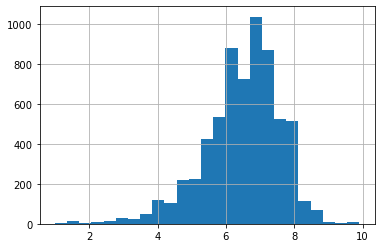

In [47]:
print(data['ratings'].mean(), data['ratings'].median())
data['ratings'].hist(bins=25)

Оставим без изменений

Изучим столбец **genres**

In [48]:
data[data['genres'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",Неизвестен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,Неизвестен,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Неизвестен,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,NaN,NaN,219569.0
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Без финансирования,NaN,NaN,NaN


По имеющимся данным заменить пропуски можно на значение "прочее"

In [49]:
data['genres'].fillna('прочее', inplace=True)
data['genres'].isna().sum()

0

Перейдем к изучению дубликатов

#### Шаг 2.3. Изучим дубликаты в датафрейме

In [50]:
data[data.duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Одинаковых строк нет, будем рассматривать всё детальнее

In [51]:
data[data.duplicated('puNumber')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Без финансирования,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,6.8,"комедия,криминал",NaN


In [52]:
data[(data['puNumber'] == 221154310) | (data['puNumber'] == 221054410)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Без финансирования,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Без финансирования,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Без финансирования,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,6.8,"комедия,криминал",NaN


Есть два фильма с одинаковыми прокатными удостоверениями, и есть два фильма с очень похожими названиями, но всё-таки это разные фильмы. При этом в одной из строк ошибка в написании имени режиссёра, что стоит исправить:

In [53]:
data.loc[5067, 'director'] = 'Гарольд Реймис'
data.loc[5067]

title                                              Анализируй это!
puNumber                                                 221054410
show_start_date                          2010-05-25 12:00:00+00:00
type                                                Художественный
film_studio              Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД
production_country                                   США-Австралия
director                                            Гарольд Реймис
producer                           Джейн Розенталь, Пола Уейнстейн
age_restriction                    «16+» - для детей старше 16 лет
refundable_support                                             NaN
nonrefundable_support                                          NaN
budget                                                         NaN
financing_source                                Без финансирования
ratings                                                        7.4
genres                                            комедия,крим

В случае с фильмами "Анализируй то!" и "Анализируй это!" ошибка могла возникнуть из-за похожих названий, в случае с другими фильмами - по каким-то иным причинам.

Проверим, есть ли фильмы с одинаковым названием.

In [54]:
data[data.duplicated('title', keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Без финансирования,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Без финансирования,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Без финансирования,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"триллер,криминал,детектив",NaN


Есть одинаковые фильмы, но у них разные прокатные удостоверения - фильмы могли выходить в прокат несколько раз в разное время.

Рассмотрим другие столбцы

In [55]:
data['financing_source'].unique()

array(['Без финансирования', 'Министерство культуры', 'Фонд кино', 0,
       'Министерство культуры, Фонд кино'], dtype=object)

In [56]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 0, ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [57]:
list(data['title'].unique())

['Открытый простор',
 'Особо важное задание',
 'Особо опасен',
 'Остановился поезд',
 'Любовь и голуби',
 'Любовь и сигареты',
 'Отпетые мошенники.',
 'Отпуск за свой счет',
 'Превосходство Борна /По одноименной новелле Роберта Ладлэма/',
 'Ответный ход',
 'Малышка на миллион /По мотивам рассказов Ф.Х.Тула из сборника "Клейма от канатов"/',
 'Преданный садовник',
 'Отель /По мотивам пьесы Джона Уэбстера/',
 'Председатель',
 'Осенний марафон',
 'Осень',
 'Неподдающиеся',
 'Неподсуден',
 'Незабываемый 1919-й год',
 'Незаконченная жизнь',
 'Операция "Ы" и другие приключения Шурика',
 'Неизвестные страницы из жизни разведчика',
 'Неисправимый лгун',
 'Призрак замка Моррисвиль',
 'Оружейный барон',
 'Отставной козы барабанщик',
 'Паршивая овца',
 'Плюмбум, или Опасная игра',
 'Первое свидание',
 'Охота на лис.',
 'Пиноккио 3000',
 'Перелом',
 'Мисс Поттер',
 'Миссис Хендерсон представляет',
 'Планета КА-ПЭКС /По мотивам романа Джин Бруэр/',
 'Молчи в тряпочку',
 'Мужики!..',
 'Автомобиль, с

In [58]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

Глядя на столбцы, ясно одно - есть большие проблемы с неявными дубликатами из-за различных знаков препинаний в названиях, странах, жанрах, но исправить их вручную, кажется, займёт огромное количество времени.

Рассмотрели дубликаты, перейдем к изучению категориальных значений

#### Шаг 2.4. Изучим категориальные значения


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     333 non-null    float64            
 10  nonrefundable_support  333 non-null    float64            
 11  budget                 333 non-null    float64          

Начнем со столбца **type**

In [60]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 0, ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Есть проблема с типами фильмов, нужно убрать пробелы

In [61]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', nan, 'Музыкально-развлекательный'],
      dtype=object)

Рассмотрим другие столбцы

При рассмотрении дубликатов стало понятно, что в столбцах с режиссерами, продюссерами, жанрами и др., помимо выявленых проблем со знаками препинания, встречаются строки, где, например, столбец genre может быть представлен строкой, в которой будет написано несколько жанров, или, например, если у фильма несколько режиссёров, то формат данных будет таким же: "режиссёр1, режиссёр2". Это может затруднить построение визуализаций. Далее мы решим эту проблему, добавив столбцы с главным жанром и главным режиссёром.

#### Шаг 2.5. Проверим количественные значения



In [62]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.486000e+03,3.330000e+02,3.330000e+02,3.330000e+02,6519.000000,3.158000e+03
mean,1.351785e+08,1.182883e+07,4.883390e+07,1.268476e+08,6.488173,7.647870e+07
std,3.838218e+07,2.488750e+07,5.994984e+07,1.884331e+08,1.114638,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.849061e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.000000e+07,1.400250e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


Неверные значения в столбце рейтингов уже исправлены, проверим другие столбцы

Кажется, есть проблемы со столбцом бюджетов.

In [63]:
data[(data['budget'] <= 0) | (data['budget'] < (data['refundable_support'] + data['nonrefundable_support']))]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,0,0,1970-01-01 00:00:00+00:00,NaN,0,0,0,0,0,0.0,0.0,0.0,0,NaN,0,NaN
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07


1 неверная строка, которую надо удалить, и 17 строк, у которых бюджет равен 0, хотя фильмы имеют поддержку. Думаю, раз строк не так много, можно заменить бюджет на сумму гос.поддержек.

In [64]:
data.drop(1797, inplace=True)

In [65]:
data[(data['budget'] <= 0) | (data['budget'] < (data['refundable_support'] + data['nonrefundable_support']))]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


От странной строки избавились, заменим бюджеты

In [66]:
data.loc[(data['budget'] <= 0) | (data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])), 'budget'] = (data['refundable_support'] + data['nonrefundable_support'])

In [67]:
data[(data['budget'] <= 0) | (data['budget'] < (data['refundable_support'] + data['nonrefundable_support']))]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Странные значения в сборах:

In [68]:
data[data['box_office'] == 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,Неизвестен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Без финансирования,7.7,"драма,биография,музыка",0.0
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,Неизвестен,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,8.2,драма,0.0
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Без финансирования,6.3,комедия,0.0
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,6.5,"драма,военный,история",0.0
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,7.4,"аниме,мультфильм,драма",0.0
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,7.7,"аниме,мультфильм,фантастика",0.0
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,7.9,биография,0.0
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Без финансирования,5.5,"комедия,мелодрама",0.0
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Без финансирования,5.8,"мелодрама,комедия,драма",0.0
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...",Германия - Бельгия - США -Франция,Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Без финансирования,6.9,драма,0.0


In [69]:
data[data['box_office'] == data['box_office'].max()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3.073569e+09


Заменить некорректные значения 0 нельзя, оставляем. Холоп действительно был достаточно успешным фильмом и собрал такую внушительную сумму.

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int32              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7485 non-null   object             
 6   director               7485 non-null   object             
 7   producer               7485 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [71]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.485000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6519.000000,3.158000e+03
mean,1.351966e+08,1.186446e+07,4.898099e+07,1.314224e+08,6.488173,7.647870e+07
std,3.835292e+07,2.491656e+07,5.998012e+07,1.871482e+08,1.114638,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,6.000000e+06,1.000000,0.000000e+00
25%,1.120251e+08,0.000000e+00,2.500000e+07,4.552480e+07,5.900000,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,7.119690e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.500000e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


Других подозрительных значений в таблице не было.

#### Шаг 2.6. Добавим новые столбцы





Добавим столбец с годом начала проката

In [72]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Без финансирования,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2015


Добавим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.



In [73]:
def get_first_value(s, sep = ','):
    try:
        value_lst = s.split(sep=sep)
        return value_lst[0]
    except:
        print(s)

data['main_director'] = data['director'].apply(get_first_value)
data['main_genre'] = data['genres'].apply(get_first_value)


In [74]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Без финансирования,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [75]:
data['support_ratio'] = (data['nonrefundable_support'] + data['refundable_support']) / data['budget']
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support_ratio
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Без финансирования,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


In [76]:
data['support_ratio'].unique()

array([       nan, 0.33370314, 0.7       , 0.61269064, 0.69009473,
       0.62476381, 0.48216008, 0.67999951, 0.53940683, 0.53743599,
       0.69999998, 0.7       , 0.68947448, 0.35272785, 0.27723917,
       0.37378187, 1.        , 0.50121231, 0.12963849, 0.62962963,
       0.65702441, 0.66656877, 0.21      , 0.12      , 0.40975944,
       0.25      , 0.66896323, 0.67994543, 0.69767442, 0.38758813,
       0.52737763, 0.22192632, 0.33671433, 0.68992812, 0.69286755,
       0.42581383, 0.36235166, 0.62036062, 0.65331017, 0.69910397,
       0.17783734, 0.69840404, 0.36146563, 0.66268254, 0.67516879,
       0.66392217, 0.69999999, 0.43054823, 0.70000001, 0.68297529,
       0.69      , 0.32432432, 0.6024407 , 0.63778177, 0.6224779 ,
       0.62459948, 0.29917895, 0.695     , 0.69999999, 0.64974102,
       0.55555556, 0.36759115, 0.68717703, 0.62287229, 0.69444444,
       0.48231756, 0.69996216, 0.67122405, 0.36097849, 0.34069436,
       0.66666667, 0.62591548, 0.5931632 , 0.37313433, 0.59226

In [77]:
data[data['support_ratio'] == 400000000]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support_ratio


### Шаг 3. Проведем исследовательский анализ данных


Посмотрим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

В столбце box_office есть пропуски и нулевые значения, но только по нему мы можем судить, выходил ли фильм в прокат или нет.

Сделаем выборку для лент, которые были в кинопрокате.

In [78]:
titles_per_year = data.groupby('year')['box_office'].count()

titles_per_year

year
2010    105
2011    109
2012    128
2013    184
2014    279
2015    465
2016    526
2017    357
2018    475
2019    530
Name: box_office, dtype: int64

<AxesSubplot:title={'center':'Количество фильмов в прокате по годам'}, xlabel='year'>

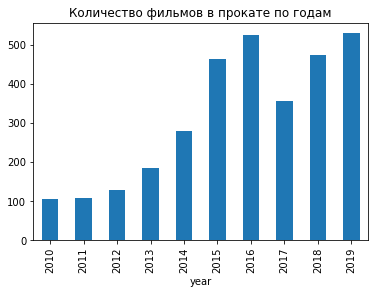

In [79]:
titles_per_year.plot(kind='bar', title='Количество фильмов в прокате по годам')

In [80]:
ratio = data.groupby('year')['box_office'].count() / data.groupby('year')['title'].count()
ratio

year
2010    0.106599
2011    0.175241
2012    0.215852
2013    0.292063
2014    0.346154
2015    0.659574
2016    0.643032
2017    0.706931
2018    0.533109
2019    0.569892
dtype: float64

<AxesSubplot:title={'center':'Отношение лент в прокате к общему числу лент'}, xlabel='year'>

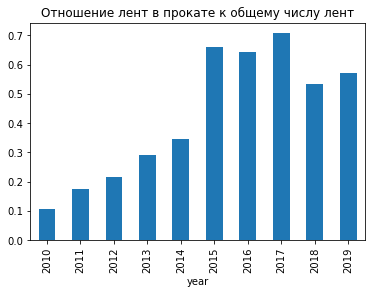

In [81]:
ratio.plot(kind='bar', title='Отношение лент в прокате к общему числу лент')

Вывод: данные в нашей выборке неоднородны, до 2015 года количество фильмов небольшое, а доля показов фильмов в кинотеатрах варьируется от 10.6 до 34.6 процентов, в связи с чем мы не можем говорить, что в эти годы было меньшее число кинопоказов.

В данных наиболее полно представлен период 2015-2019 - здесь количество фильмов и отношение лент в прокате варьируется меньше, а самих данных фильмов в датасете больше.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [82]:
box_office_per_year = data.pivot_table(index='year', values='box_office', aggfunc=[sum, np.mean, np.median])
box_office_per_year.columns = ['sum', 'mean', 'median']
box_office_per_year

,sum,mean,median
year,,,
2010,2.428654e+06,2.313004e+04,1700.000
2011,1.410276e+07,1.293832e+05,3000.000
2012,6.955423e+06,5.433924e+04,5660.000
2013,2.979971e+07,1.619549e+05,3522.500
2014,7.444952e+09,2.668442e+07,18160.000
2015,3.949737e+10,8.494057e+07,4920933.000
2016,4.786630e+10,9.100057e+07,3846679.410
2017,4.856371e+10,1.360328e+08,9968340.000
2018,4.966840e+10,1.045651e+08,8891102.210


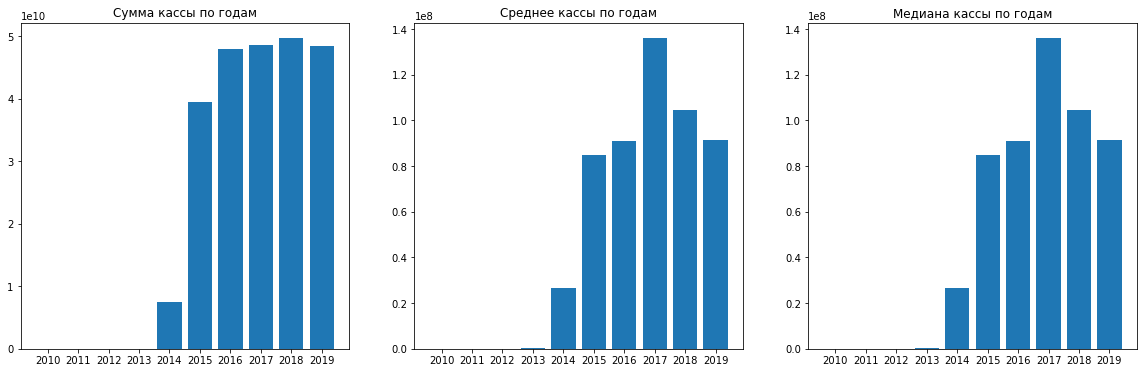

In [83]:
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=3)

ax[0].bar(x=box_office_per_year['sum'].index, height=box_office_per_year['sum'])
ax[0].set_title('Сумма кассы по годам')
ax[0].set_xticks(box_office_per_year['sum'].index)

ax[1].bar(x=box_office_per_year['mean'].index, height=box_office_per_year['mean'])
ax[1].set_title('Среднее кассы по годам')
ax[1].set_xticks(box_office_per_year['mean'].index)

ax[2].bar(x=box_office_per_year['mean'].index, height=box_office_per_year['mean'])
ax[2].set_title('Медиана кассы по годам')
ax[2].set_xticks(box_office_per_year['mean'].index)

Мы не можем объективно судить о выборке лент, вышедших до 2015 года. Но если брать эти годы, то минимальные сборы приходятся на 2010 год, если не брать, то на 2015.

Самая большая касса за период 2015-2019 была в 2018 году, но при этом средняя и медианная касса у фильмов была выше в 2017 году, т.е. в среднем фильмы собирали больше, хотя и лент 2017 года в нашем датасете больше.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

In [84]:
a = data.query('year > 2014').groupby('age_restriction')['box_office'].sum().sort_values()
a

age_restriction
«0+» - для любой зрительской аудитории    8.090774e+08
«18+» - запрещено для детей               4.075962e+10
«6+» - для детей старше 6 лет             5.579861e+10
«12+» - для детей старше 12 лет           6.061945e+10
«16+» - для детей старше 16 лет           7.603473e+10
Name: box_office, dtype: float64

In [85]:
data.query('year > 2014').pivot_table(index=['year', 'age_restriction'], values='box_office', aggfunc=sum)

box_office
year age_restriction                                     
2015 «0+» - для любой зрительской аудитории  3.790546e+08
     «12+» - для детей старше 12 лет         1.361608e+10
     «16+» - для детей старше 16 лет         1.136812e+10
     «18+» - запрещено для детей             5.432308e+09
     «6+» - для детей старше 6 лет           8.701799e+09
2016 «0+» - для любой зрительской аудитории  1.502288e+08
     «12+» - для детей старше 12 лет         1.220445e+10
     «16+» - для детей старше 16 лет         1.666455e+10
     «18+» - запрещено для детей             6.793930e+09
     «6+» - для детей старше 6 лет           1.205315e+10
2017 «0+» - для любой зрительской аудитории  2.295989e+08
     «12+» - для детей старше 12 лет         7.851428e+09
     «16+» - для детей старше 16 лет         1.874504e+10
     «18+» - запрещено для детей             9.651496e+09
     «6+» - для детей старше 6 лет           1.208614e+10
2018 «0+» - для любой зрительской аудитории  3.244900e+07
     «12+» - для детей старше 12 лет         1.426729e+10
     «16+» - для детей старше 16 лет         1.650360e+10
     «18+» - запрещено для детей             8.760086e+09
     «6+» - для детей старше 6 лет           1.010497e+10
2019 «0+» - для любой зрительской аудитории  1.774607e+07
     «12+» - для детей старше 12 лет         1.268020e+10
     «16+» - для детей старше 16 лет         1.275342e+10
     «18+» - запрещено для детей             1.012180e+10
     «6+» - для детей старше 6 лет           1.285255e+10

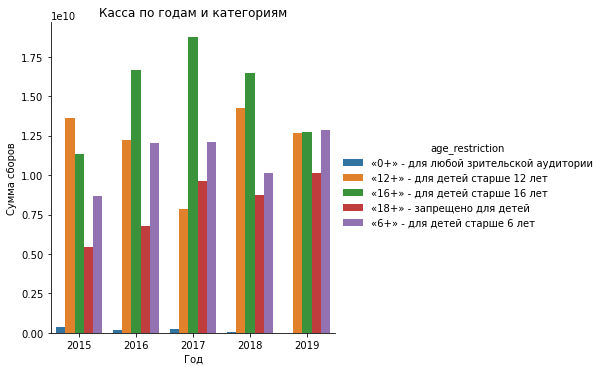

In [86]:
visual = data.query('2015 <= year').groupby(['year', 'age_restriction'])['box_office'].agg('sum').reset_index()

sns.catplot(x='year', y='box_office', hue='age_restriction', data=visual, kind='bar');
plt.title('Касса по годам и категориям');
plt.xlabel('Год');
plt.ylabel('Сумма сборов');

In [87]:
visual.columns

Index(['year', 'age_restriction', 'box_office'], dtype='object')

Как мы видим, в 2015 году фильмы категории 12+ собрали сильно больше остальных, в 2016-2018 - фильмы категории 16+ лидируют по сборам, в 2019 году фильмы категорий 12+, 16+ и 0+ собрали примерно одинаковые суммы. Фильмы 18+ в целом начиная с 2015 года стали собирать больше, сумма фильмов 16+ росла до 2017 года, затем начала падать, фильмы 0+ собрали во все годы очень маленькие по отношению к остальным суммы, и с каждым годом суммы уменьшались, в остальнух случаях чёткой зависимости нет.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку


Выберем такие фильмы

In [88]:
sup = data[~data['budget'].isna()]
sup

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support_ratio
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,прочее,2.814000e+04,2014,А.Якимчук,прочее,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,0.510204
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,0.526316
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.529661
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,0.649998


In [89]:
sup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    int32              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               332 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

Добавим столбцы с разностью между сборами и бюджетом, столбец с суммой гос. поддержки и столбец о том, окупился ли фильм

In [90]:
import warnings

warnings.filterwarnings("ignore")

sup.loc[:, 'profit'] = sup['box_office'] - sup['budget']
sup.loc[:, 'total_support'] = sup['refundable_support'] + sup['nonrefundable_support'] 

def f(s):
    if s > 0:
        return 'да'
    return 'нет'

sup.loc[:, 'paid_off'] = sup['profit'].apply(f)


sup.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support_ratio,profit,total_support,paid_off
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.333703,-79046546.4,26500000.0,нет
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,прочее,28140.0,2014,А.Якимчук,прочее,0.700000,-37114717.0,26000000.0,нет
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.612691,-156066458.5,107847945.0,нет
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095,-40518222.5,28000000.0,нет
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,0.624764,-39783022.0,25000000.0,нет


Изучим данные

In [91]:
sup.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,year,support_ratio,profit,total_support
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,316.000000,3.180000e+02,332.000000,332.000000,3.180000e+02,3.320000e+02
mean,1.115938e+08,1.186446e+07,4.898099e+07,1.314224e+08,6.020886,1.324324e+08,2016.719880,0.542098,4.256980e+05,6.084545e+07
std,5.703031e+06,2.491656e+07,5.998012e+07,1.871482e+08,1.148943,3.348379e+08,1.640637,0.196925,3.159104e+08,7.275546e+07
min,1.110001e+08,0.000000e+00,0.000000e+00,6.000000e+06,1.000000,1.550000e+03,2013.000000,0.044043,-1.971477e+09,3.000000e+06
25%,1.110049e+08,0.000000e+00,2.500000e+07,4.552480e+07,5.300000,1.236676e+06,2015.000000,0.384615,-7.069443e+07,2.533375e+07
50%,1.110104e+08,0.000000e+00,3.000000e+07,7.119690e+07,6.200000,1.572007e+07,2017.000000,0.614038,-4.068082e+07,3.500000e+07
75%,1.110178e+08,1.500000e+07,4.037500e+07,1.500000e+08,6.700000,1.063730e+08,2018.000000,0.661412,-2.362182e+06,6.000000e+07
max,2.140101e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.400000,3.073569e+09,2019.000000,1.000000,2.913569e+09,5.000000e+08


In [92]:
sup.groupby('year')['total_support'].count()

year
2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    70
Name: total_support, dtype: int64

<AxesSubplot:xlabel='year'>

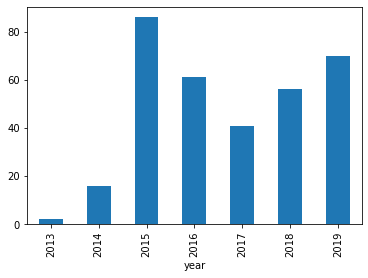

In [93]:
sup.groupby('year')['total_support'].count().plot(kind='bar')

Данных о фильмах до 2015 года слишком мало, эти данные мы не будем анализировать.

Видим, что самое большое количество фильмов с гос. поддержкой вышло в 2015 году, далее количество таких фильмов идет на спад, и с 2018 вновь растёт.

In [94]:
sup = sup[sup['year'] > 2014]
sup.year.unique()

array([2015, 2016, 2017, 2018, 2019], dtype=int64)

Изучим поддержку

,sum,max,mean,median
year,,,,
2015,3.656241e+09,250000000.0,4.251444e+07,30000000.0
2016,4.303155e+09,450000000.0,7.054353e+07,35000000.0
2017,3.183972e+09,400000000.0,7.765785e+07,40000000.0
2018,3.446969e+09,260000000.0,6.155303e+07,45000000.0
2019,4.904000e+09,500000000.0,7.005714e+07,40000000.0


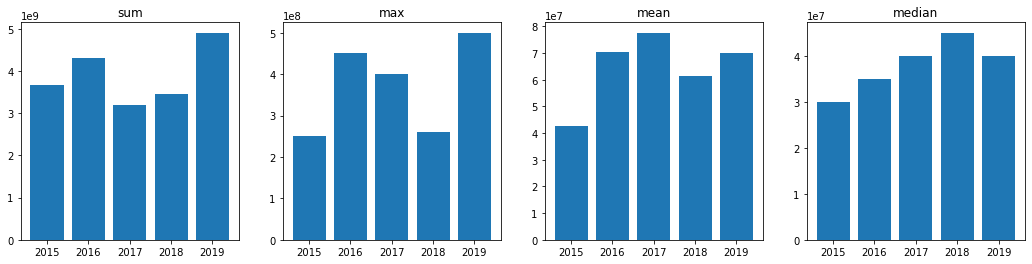

In [95]:
a = sup.groupby('year')['total_support'].agg(['sum', 'max', 'mean', 'median'])


fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=4)
ax[0].bar(a.index, a['sum'])
ax[0].set_title('sum')

ax[1].bar(a.index, a['max'])
ax[1].set_title('max')

ax[2].bar(a.index, a['mean'])
ax[2].set_title('mean')

ax[3].bar(a.index, a['median'])
ax[3].set_title('median')

a

Рассмотрим рейтинги

<AxesSubplot:xlabel='year'>

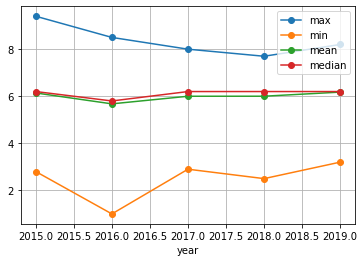

In [96]:
b = sup.groupby('year')['ratings'].agg(['max', 'min', 'mean', 'median']).plot(grid=True, style='o-')
b

Максимальная оценка с каждым годом только падала, при этом средняя оценка и медиана примерно одинаковые (в 2016 году среднее чуть ниже из-за какой-то ужасной ленты с оценкой в 1 балл). В остальном, минимальные рейтинги становятся выше.

In [97]:
sup.corr()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,year,support_ratio,profit,total_support
puNumber,1.000000,0.007472,-0.031469,-0.019093,0.036130,0.044674,-0.027860,0.012705,-0.013241,-0.023382
refundable_support,0.007472,1.000000,0.360857,0.655236,0.002811,0.307982,0.063654,0.009204,-0.045878,0.639584
nonrefundable_support,-0.031469,0.360857,1.000000,0.619170,0.127870,0.457114,0.107270,0.138658,0.141289,0.947724
budget,-0.019093,0.655236,0.619170,1.000000,0.090549,0.372979,0.156376,-0.280956,-0.189099,0.734542
ratings,0.036130,0.002811,0.127870,0.090549,1.000000,0.148651,0.036801,-0.073181,0.095458,0.106292
box_office,0.044674,0.307982,0.457114,0.372979,0.148651,1.000000,0.106103,-0.079808,0.840570,0.488537
year,-0.027860,0.063654,0.107270,0.156376,0.036801,0.106103,1.000000,-0.106166,0.018230,0.110197
support_ratio,0.012705,0.009204,0.138658,-0.280956,-0.073181,-0.079808,-0.106166,1.000000,0.089074,0.117439
profit,-0.013241,-0.045878,0.141289,-0.189099,0.095458,0.840570,0.018230,0.089074,1.000000,0.100806
total_support,-0.023382,0.639584,0.947724,0.734542,0.106292,0.488537,0.110197,0.117439,0.100806,1.000000


<AxesSubplot:>

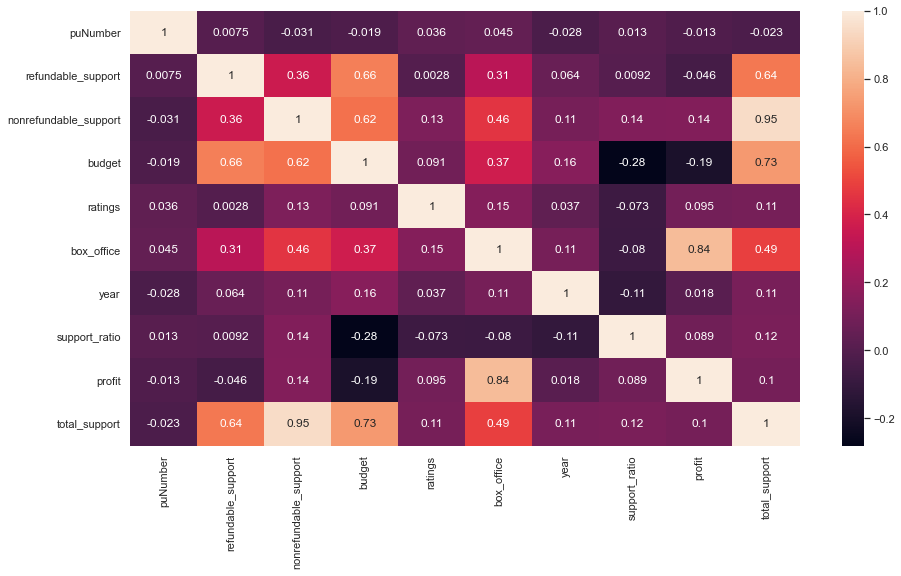

In [98]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(sup.corr(), annot=True)


По корреляциям так же становится понятно - бюджет мало влияет на рейтинг. 


Сколько денег ни давай, плохая идея хорошей не станет :)

Окупаемость фильмов и общая прибыль

<AxesSubplot:ylabel='title'>

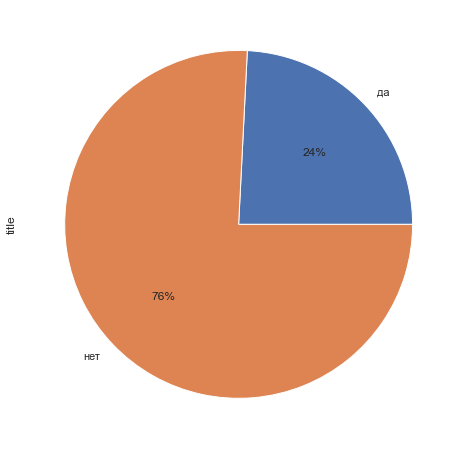

In [99]:
sup.groupby('paid_off')['title'].count().plot(kind='pie', autopct='%.0f%%')

Из фильмов, получивших гос. поддержку, окупились только четверть.

In [100]:
print("Итоговая прибыль за 2015-2019:", sum(sup['profit'].dropna()))

Итоговая прибыль за 2015-2019: 655547573.0800011


Однако, несмотря на такое количество фильмов, которые не смогли окупиться, денег госудерственый фонд заработал больше, чем потратил. Изучим топ-10 самых провальных и самых успешных фильмов.

In [101]:
top_worst_10 = sup.sort_values('profit').head(10)[['title', 'year', 'age_restriction', 'director', 'budget', 'total_support', 'genres', 'ratings', 'profit']]
top_worst_10

,title,year,age_restriction,director,budget,total_support,genres,ratings,profit
7114,Тайна Печати Дракона,2019,«6+» - для детей старше 6 лет,О.Степченко,2.305074e+09,270000000.0,"приключения,фэнтези",5.8,-1.971477e+09
7171,Грех,2019,«16+» - для детей старше 16 лет,А.Михалков (псевдоним А.Кончаловский),7.799420e+08,60000000.0,"драма,биография,история",6.9,-7.256988e+08
5437,Матильда,2017,«16+» - для детей старше 16 лет,А.Учитель,1.032906e+09,300000000.0,"фэнтези,комедия,семейный",7.7,-5.211304e+08
2142,Территория,2015,«12+» - для детей старше 12 лет,А.Мельник,5.000000e+08,60000000.0,"детектив,фэнтези,триллер",6.8,-4.274217e+08
6887,Девятая,2019,«16+» - для детей старше 16 лет,Н.Хомерики,4.537047e+08,300000000.0,"детектив,триллер,криминал",5.8,-3.978278e+08
6699,Тобол,2019,«16+» - для детей старше 16 лет,"И.Зайцев, О.Урушев",4.998266e+08,130000000.0,"история,драма",5.8,-3.616637e+08
5914,Гурвинек. Волшебная игра,2018,«6+» - для детей старше 6 лет,"И.Евланникова, Д.Моллер, М.Котик",3.850000e+08,60000000.0,"мультфильм,фэнтези,комедия",3.5,-3.546741e+08
3042,Крякнутые каникулы,2015,«6+» - для детей старше 6 лет,В.Лакисов,3.990753e+08,40000000.0,"мультфильм,комедия,приключения",5.4,-3.293816e+08
3351,Дуэлянт,2016,«16+» - для детей старше 16 лет,А.Мизгирев,6.842005e+08,450000000.0,драма,6.6,-3.199154e+08
7464,Союз спасения,2019,«12+» - для детей старше 12 лет,А.Кравчук,9.800000e+08,500000000.0,"история,биография,драма",6.0,-2.622968e+08


In [102]:
top_best_10 = sup.dropna().sort_values('profit', ascending=False).head(10)[['title', 'year', 'age_restriction', 'director', 'budget', 'total_support', 'genres', 'ratings', 'profit']]
top_best_10

,title,year,age_restriction,director,budget,total_support,genres,ratings,profit
7456,Холоп,2019,«12+» - для детей старше 12 лет,К.Шипенко,160000000.0,60000000.0,комедия,6.8,2.913569e+09
5653,Движение вверх,2017,«6+» - для детей старше 6 лет,А.Мегердичев,590192191.0,400000000.0,"спорт,драма",7.5,2.189494e+09
6549,Т-34,2018,«12+» - для детей старше 12 лет,А.Сидоров,563784717.0,180000000.0,"драма,военный,боевик",6.5,1.707969e+09
5505,Последний богатырь,2017,«12+» - для детей старше 12 лет,Д.Дьяченко,352477575.0,100000000.0,"комедия,фэнтези,приключения",6.8,1.302560e+09
3565,Притяжение (2016),2016,«12+» - для детей старше 12 лет,Ф.Бондарчук,250000000.0,250000000.0,фантастика,5.6,7.883215e+08
2920,Экипаж .,2016,«6+» - для детей старше 6 лет,Н.Лебедев,635283867.0,442104482.0,"драма,триллер,приключения",7.6,7.669715e+08
5641,Ёлки Новые,2017,«6+» - для детей старше 6 лет,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...",174381922.0,100000000.0,"комедия,мелодрама",5.8,6.810691e+08
5659,Три богатыря и принцесса Египта,2017,«6+» - для детей старше 6 лет,К.Феоктистов,174464395.0,50000000.0,"мультфильм,приключения,семейный",5.5,5.847624e+08
2701,Самый Лучший День,2015,«16+» - для детей старше 16 лет,А.Першин (псевдоним Ж.Крыжовников),130619336.0,63000000.0,"комедия,музыка",4.7,5.524097e+08
5749,Я худею,2018,«16+» - для детей старше 16 лет,А.Черномазов (псевдоним Алексей Нужный),87649127.0,30000000.0,комедия,6.9,5.458131e+08


Интересно, что у худших по окупаемости фильмов бюджеты намного больше, чем у самых "профитных". Возможно, огромное количество средств тратится на рекламу. При этом, нельзя сказать, что у самых окупаемых фильмов выше рейтинги: например, у фильма "Самый Лучший день" рейтинг 4.7 - очень плохо, а у фильма "Матильда" - 7.7, хотя он в большом убытке.

Изучим жанры

In [103]:
sup.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office', 'year',
       'main_director', 'main_genre', 'support_ratio', 'profit',
       'total_support', 'paid_off'],
      dtype='object')

In [104]:
genres = sup.groupby('main_genre')['total_support'].agg(['count', 'sum', 'mean', 'median']).reset_index().sort_values(by='sum', ascending=False).head(10)
genres

,main_genre,count,sum,mean,median
5,драма,85,5.018904e+09,5.904593e+07,30000000.0
7,комедия,71,3.052435e+09,4.299204e+07,35000000.0
10,мультфильм,30,2.391520e+09,7.971733e+07,65000000.0
19,фантастика,10,1.381000e+09,1.381000e+08,85000000.0
20,фэнтези,11,1.032900e+09,9.390000e+07,34000000.0
6,история,4,1.020000e+09,2.550000e+08,240000000.0
17,триллер,15,7.696453e+08,5.130969e+07,40000000.0
12,приключения,7,6.960000e+08,9.942857e+07,40000000.0
13,прочее,15,6.629695e+08,4.419796e+07,30000000.0
3,детектив,5,4.850000e+08,9.700000e+07,55000000.0


Наиболее популярные жанры у лент, получающих поддержку - драма, комедия и мультфильм - их больше всего. При этом в среднем получают больше всего фантастические и исторические фильмы - для первых нужна дорогая графика, а вот со вторыми трудно сказать, да и их всего 4 в нашей выборке, что довольно мало для чёткого вывода.

Проанализируем наиболее поддерживаемых отечественных режиссёров

In [105]:
directors = sup.groupby('main_director')[['total_support', 'profit', 'ratings']].agg(['count', 'sum', 'mean','median'])
directors.columns = ['_'.join(c) for c in directors.columns.values]
directors.sort_values('total_support_sum', ascending=False).head(10)

,total_support_count,total_support_sum,total_support_mean,total_support_median,profit_count,profit_sum,profit_mean,profit_median,ratings_count,ratings_sum,ratings_mean,ratings_median
main_director,,,,,,,,,,,,
Н.Хомерики,3,660000000.0,220000000.0,300000000.0,3,-3.255617e+08,-1.085206e+08,-9.293034e+07,3,18.1,6.033333,5.80
Ф.Бондарчук,1,500000000.0,500000000.0,500000000.0,0,0.000000e+00,NaN,NaN,1,5.7,5.700000,5.70
А.Кравчук,1,500000000.0,500000000.0,500000000.0,1,-2.622968e+08,-2.622968e+08,-2.622968e+08,1,6.0,6.000000,6.00
А.Мизгирев,1,450000000.0,450000000.0,450000000.0,1,-3.199154e+08,-3.199154e+08,-3.199154e+08,1,6.6,6.600000,6.60
Н.Лебедев,1,442104482.0,442104482.0,442104482.0,1,7.669715e+08,7.669715e+08,7.669715e+08,1,7.6,7.600000,7.60
А.Мегердичев,1,400000000.0,400000000.0,400000000.0,1,2.189494e+09,2.189494e+09,2.189494e+09,1,7.5,7.500000,7.50
Р.Давлетьяров,4,352000000.0,88000000.0,86000000.0,4,-3.151008e+08,-7.877521e+07,-1.000335e+08,4,28.6,7.150000,7.10
Д.Дьяченко,4,351000000.0,87750000.0,83000000.0,4,1.624203e+09,4.060508e+08,1.548375e+08,4,22.6,5.650000,5.45
И.Шурховецкий,1,350000000.0,350000000.0,350000000.0,1,9.039234e+07,9.039234e+07,9.039234e+07,1,6.4,6.400000,6.40


Среди таких режиссёров самыми поддерживаемым оказались Хомерики, (т.к. по фильмам Бондарчука данных нет), а так же Кравчук, Мизгирев и Лебедев. При этом "в плюс" вышла только картина Лебедева "Экипаж" (и получила самый высокий среди представленных средний рейтинг).

Посмотрим, какие режиссёры смогли заработать больше всего денег.

In [106]:
directors.sort_values('profit_sum', ascending=False).head(10)

,total_support_count,total_support_sum,total_support_mean,total_support_median,profit_count,profit_sum,profit_mean,profit_median,ratings_count,ratings_sum,ratings_mean,ratings_median
main_director,,,,,,,,,,,,
К.Шипенко,2,285000000.0,1.425000e+08,142500000.0,2,3.172515e+09,1.586257e+09,1.586257e+09,2,14.2,7.10,7.10
А.Мегердичев,1,400000000.0,4.000000e+08,400000000.0,1,2.189494e+09,2.189494e+09,2.189494e+09,1,7.5,7.50,7.50
А.Сидоров,1,180000000.0,1.800000e+08,180000000.0,1,1.707969e+09,1.707969e+09,1.707969e+09,1,6.5,6.50,6.50
Д.Дьяченко,4,351000000.0,8.775000e+07,83000000.0,4,1.624203e+09,4.060508e+08,1.548375e+08,4,22.6,5.65,5.45
О.Трофим,1,85000000.0,8.500000e+07,85000000.0,1,1.297147e+09,1.297147e+09,1.297147e+09,0,0.0,NaN,NaN
Ф.Бондарчук,1,250000000.0,2.500000e+08,250000000.0,1,7.883215e+08,7.883215e+08,7.883215e+08,1,5.6,5.60,5.60
Н.Лебедев,1,442104482.0,4.421045e+08,442104482.0,1,7.669715e+08,7.669715e+08,7.669715e+08,1,7.6,7.60,7.60
Д.Шмидт,3,215000000.0,7.166667e+07,75000000.0,3,6.983123e+08,2.327708e+08,3.110692e+08,3,18.6,6.20,6.20
Д.Киселев,2,350000000.0,1.750000e+08,175000000.0,2,6.969594e+08,3.484797e+08,3.484797e+08,2,13.3,6.65,6.65


Появились новые имена, наибольшую прибыль принесли фильмы Шипенко.

### Шаг 5. Общий вывод

Подводя итог по проекту по исследованию российского кинопроката, мы столкнулись с большим количеством проблем, связанных с предобработкой данных: дубликатами и пропусками в данных, часть из которых, к сожалению, невозможно заменить. Кроме того, мы столкнулись с аномальными и некорректными значениями в столбцах с прокатными удостоверениями, рейтингами, бюджетами и др.

После этого мы добавили новые столбцы с информацией о годе проката, именем главного режиссёра и основным жанром фильма, посчитали долю гос. поддержки от бюджета фильма.

Затем был проведен исследовательский анализ данных, а именно:

- Исследовано, сколько фильмов выходило в прокат каждый год.
- Изучено, как менялась динамика проката по годам.
- Найдены средние и медианные суммы сборов для каждого года.
- Определена сила влияния возрастного ограничения аудитории на сборы фильма в прокате.

Отдельно были исследованы фильмы, получившие гос. поддержку.